## 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn           as sb
import scipy.stats       as sp

In [2]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(777)

스케일러 라이브러리

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import joblib

## 데이터 불러오기

In [4]:
for i in range (100):
    temp_data = pd.read_csv('D:/testoneblow/sidewall thickness data/dp%d-blow-thick-sidewallcut.csv'%(i+1), sep=',')
    s = "thickness_dp%d = temp_data.iloc[:,1:]"%(i+1)
    exec(s)

Text(0.5, 1.0, 'dp4 sidewall thickness')

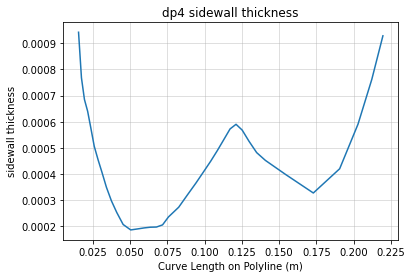

In [86]:
plt.plot(thickness_dp4.iloc[:,0],thickness_dp4.iloc[:,1])
plt.grid(alpha = 0.5)
plt.xlabel("Curve Length on Polyline (m)")
plt.ylabel("sidewall thickness")
plt.title("dp4 sidewall thickness")


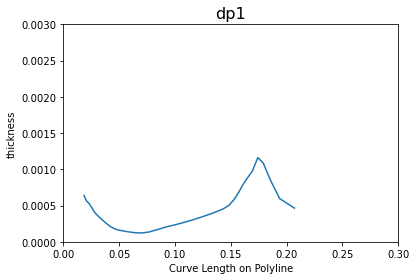

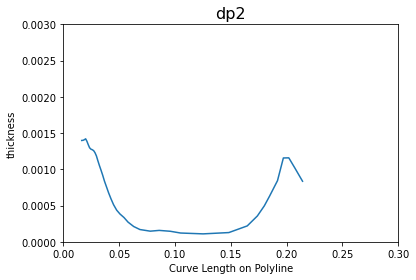

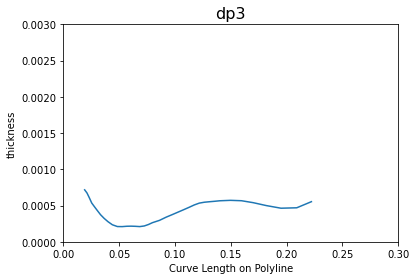

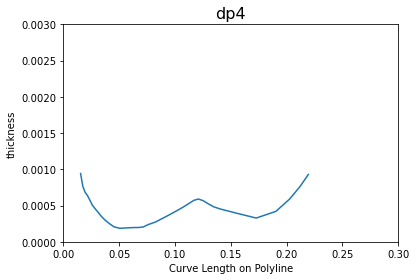

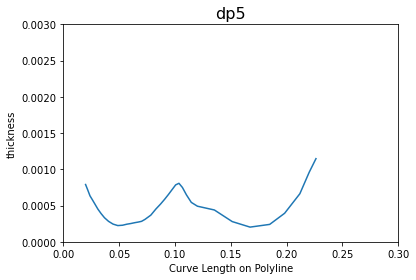

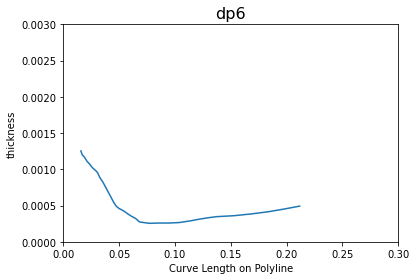

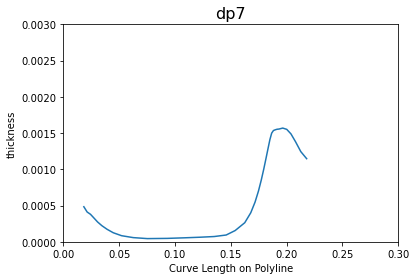

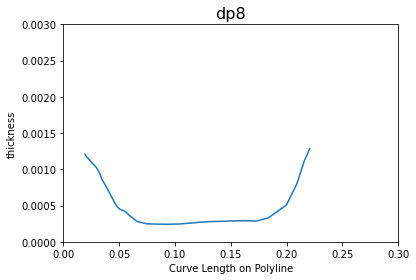

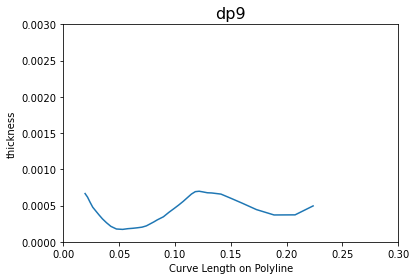

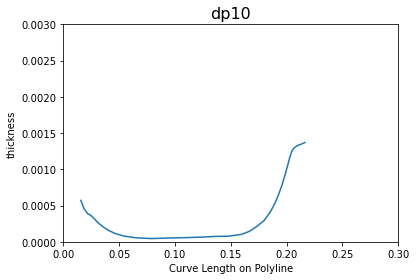

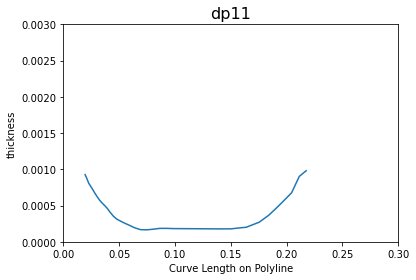

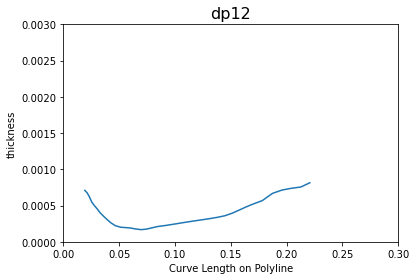

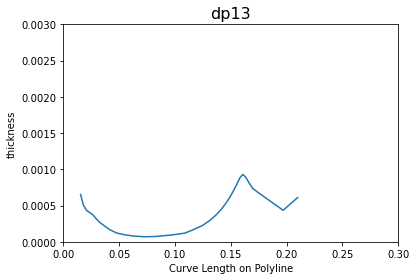

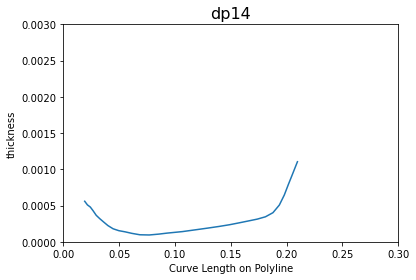

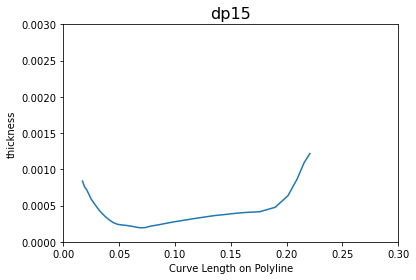

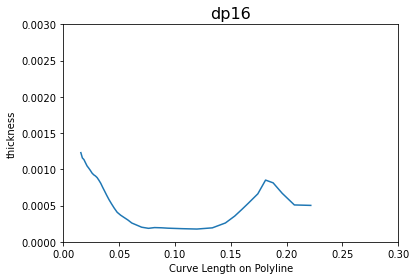

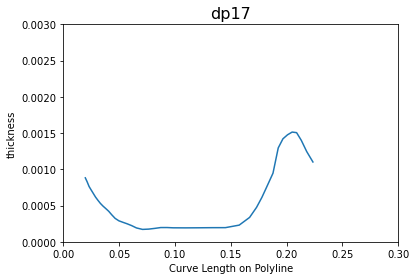

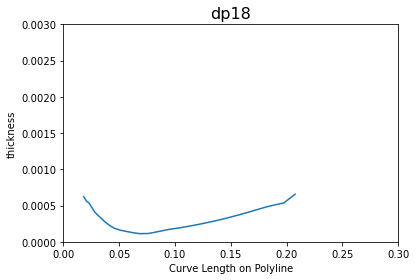

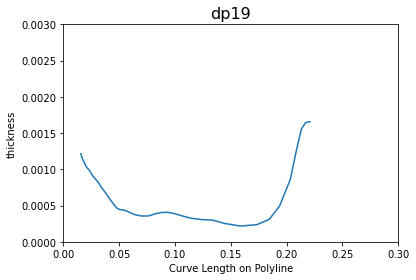

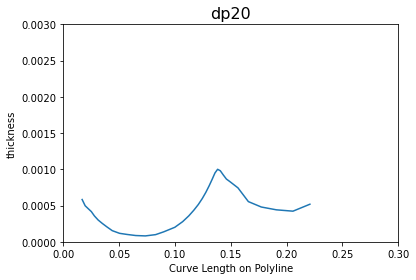

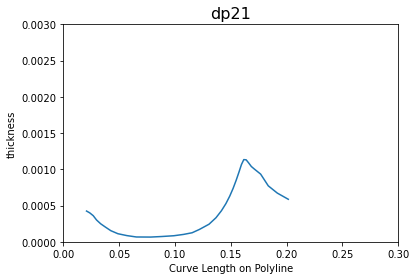

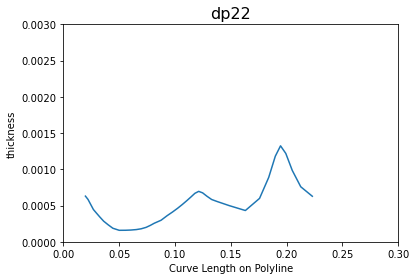

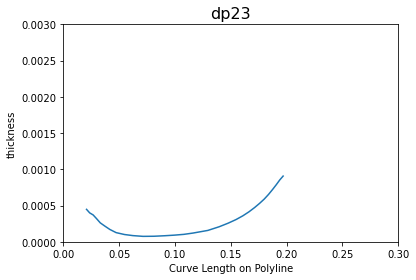

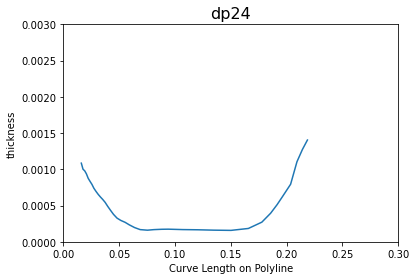

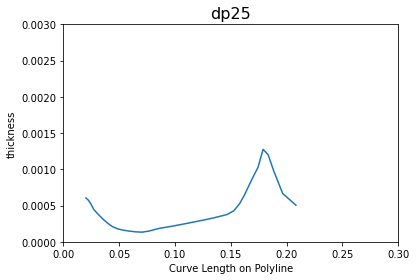

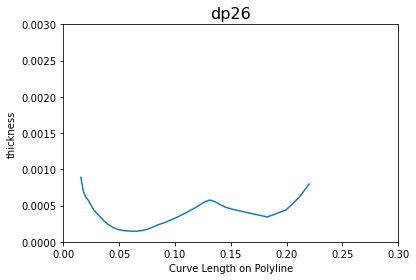

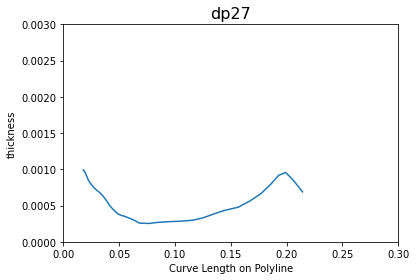

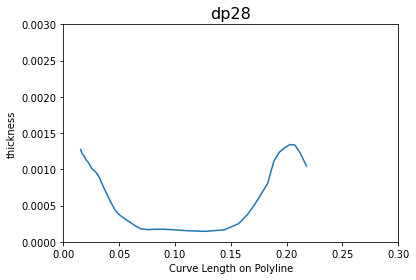

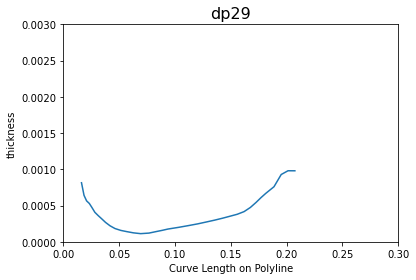

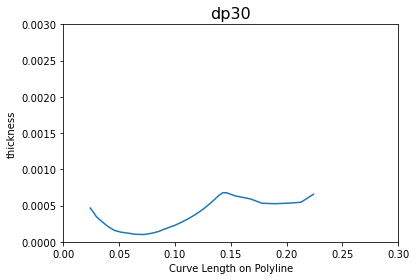

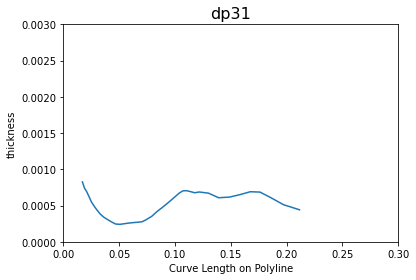

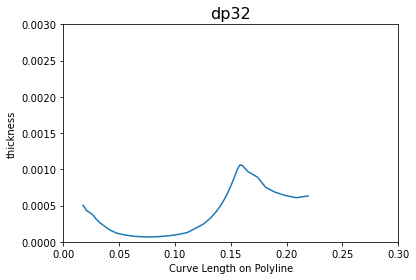

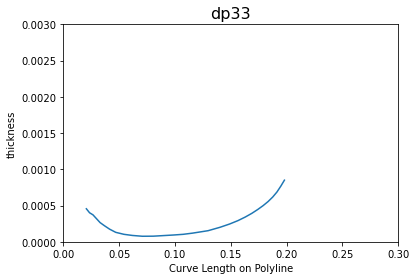

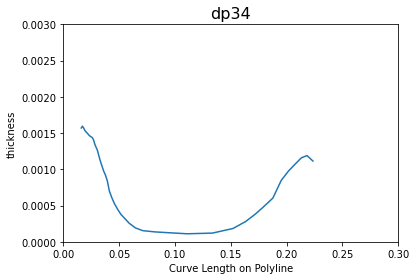

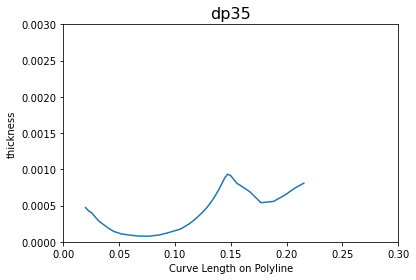

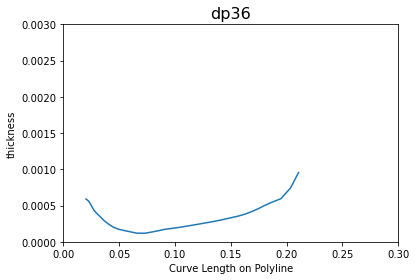

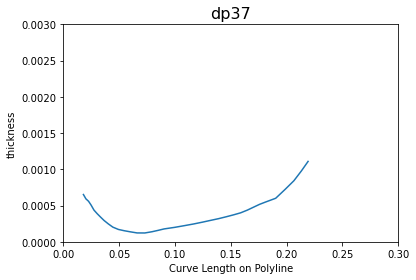

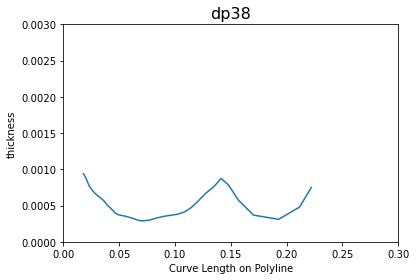

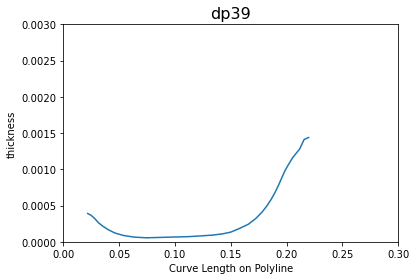

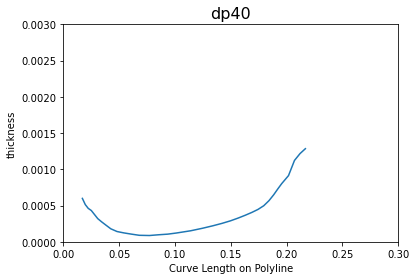

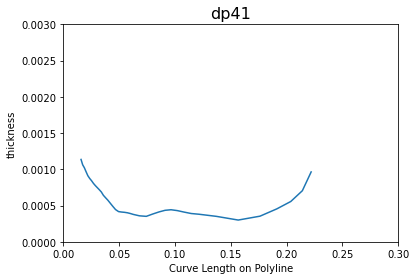

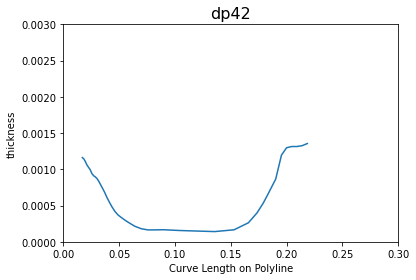

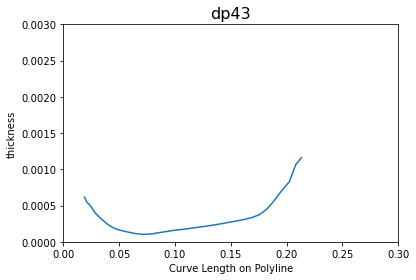

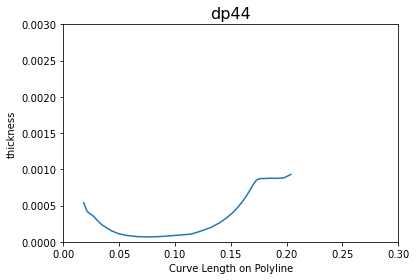

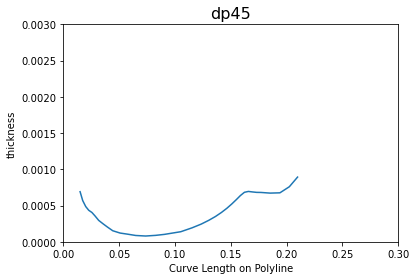

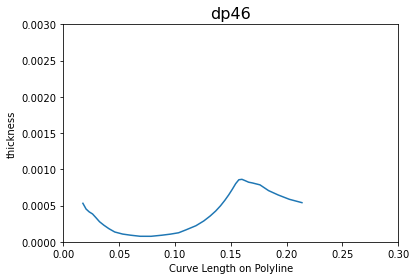

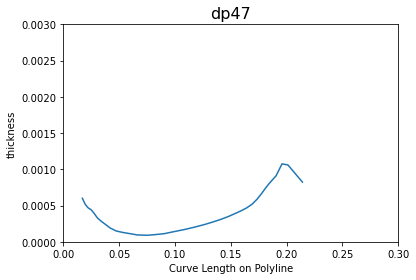

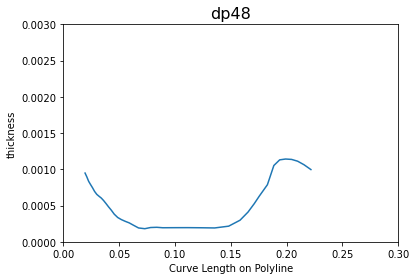

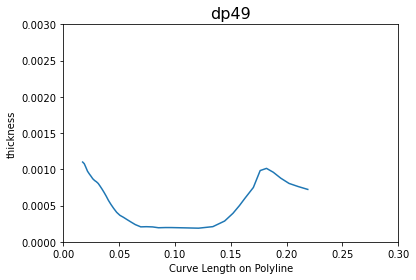

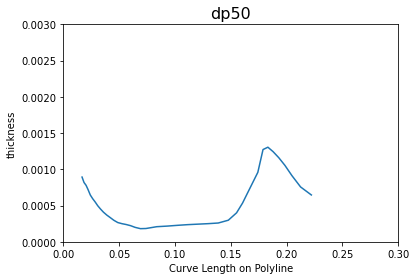

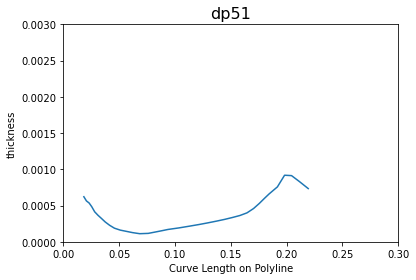

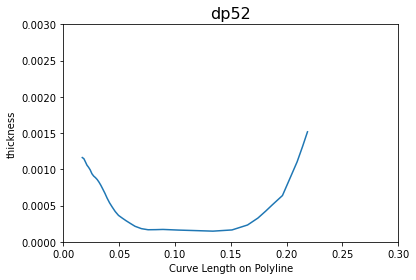

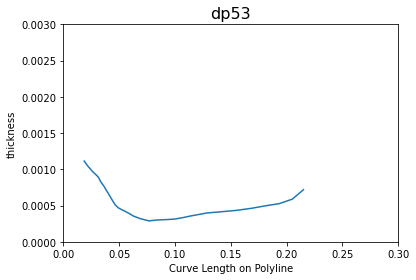

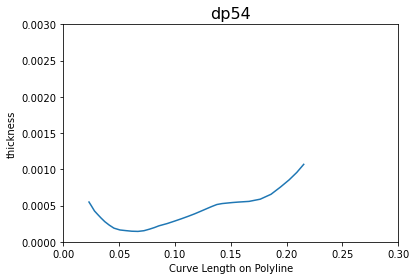

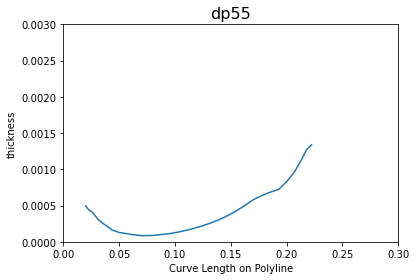

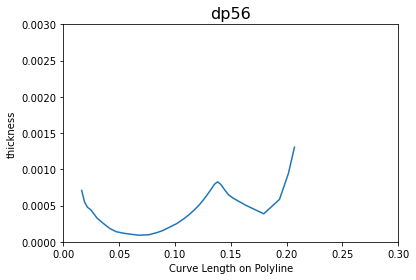

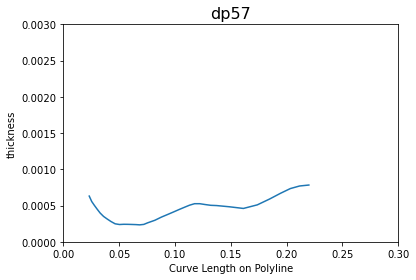

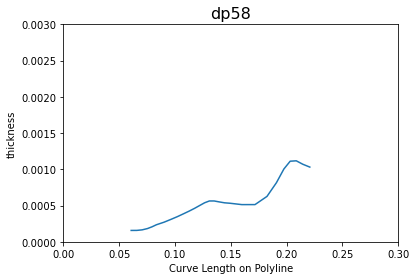

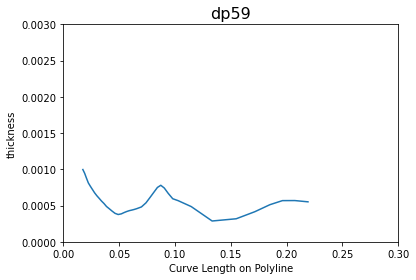

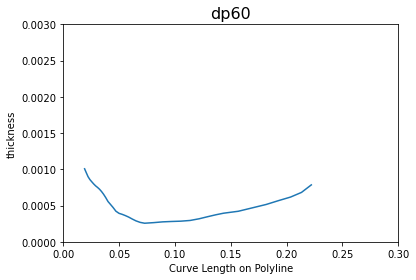

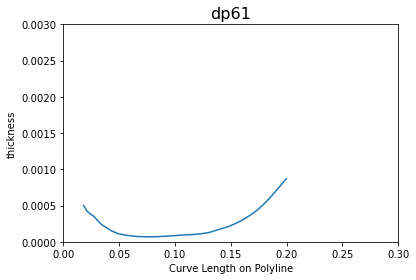

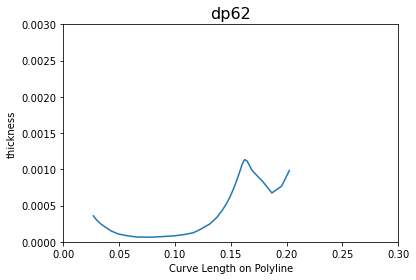

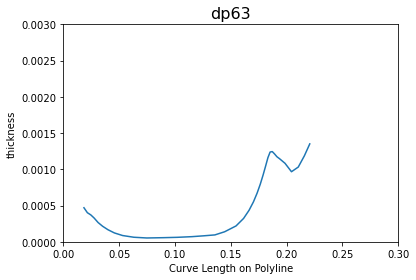

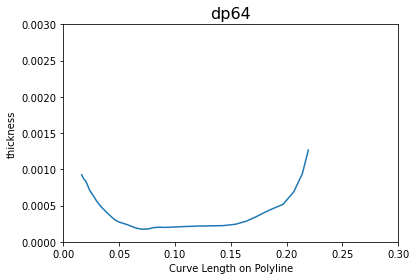

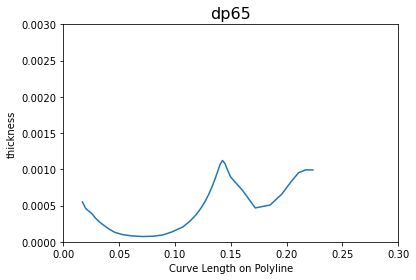

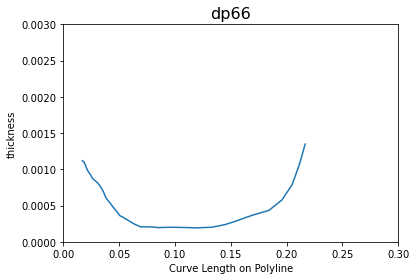

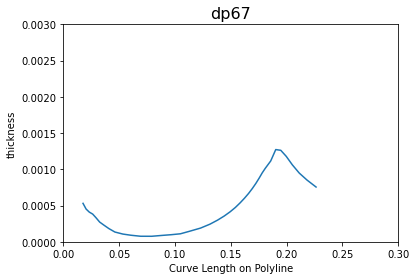

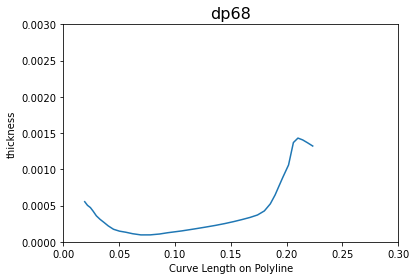

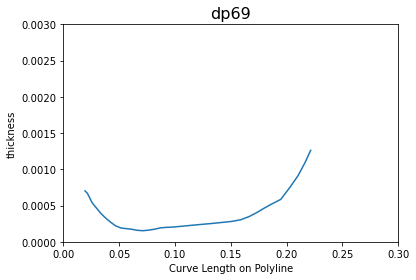

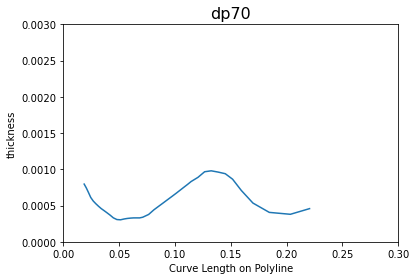

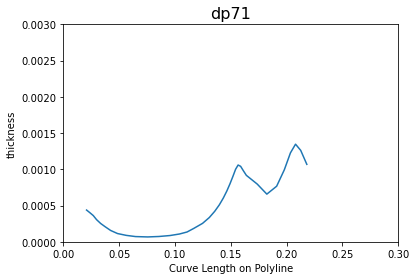

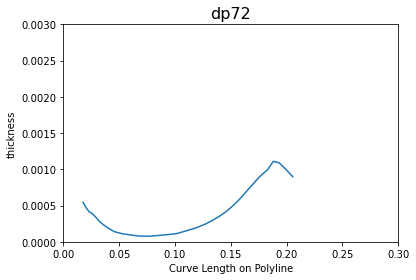

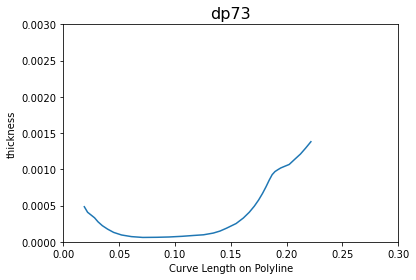

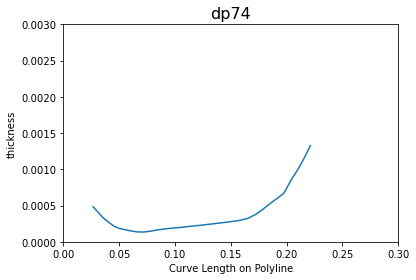

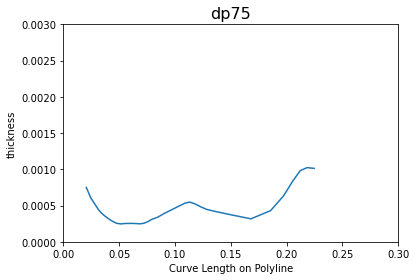

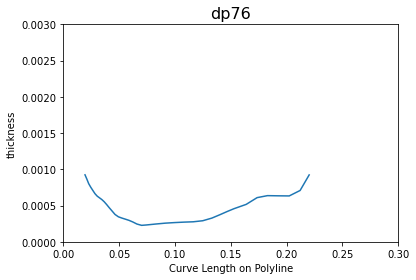

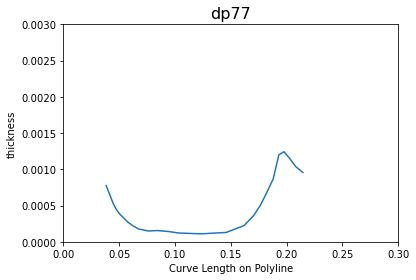

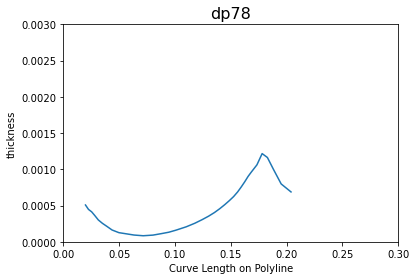

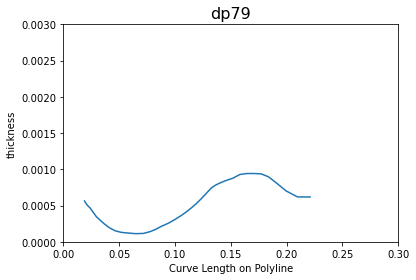

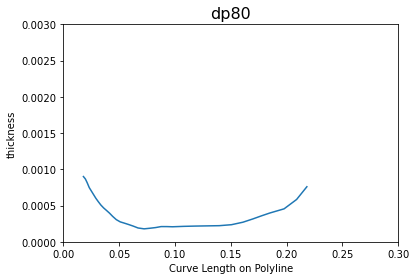

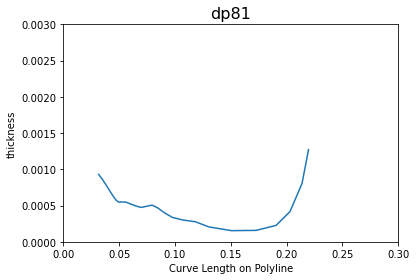

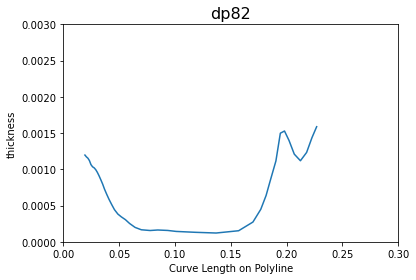

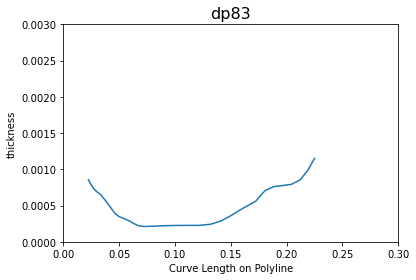

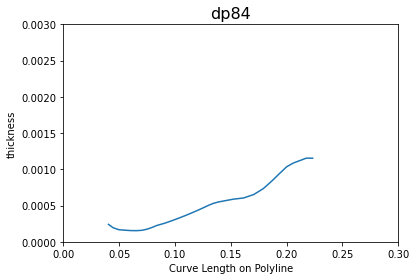

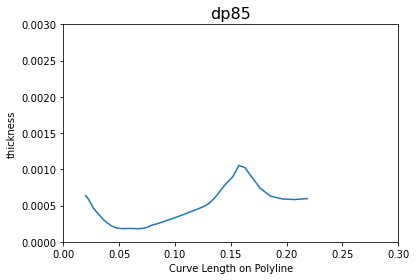

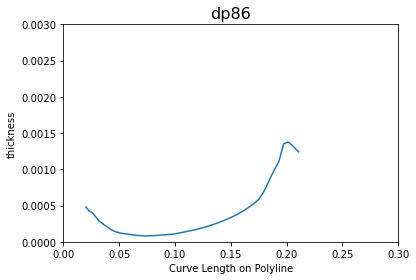

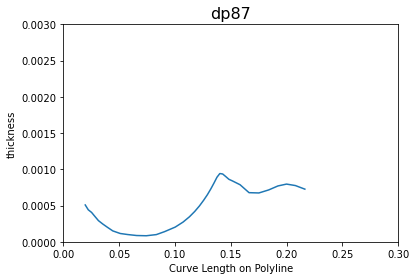

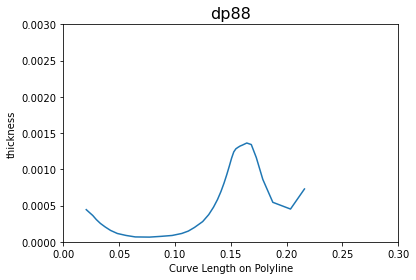

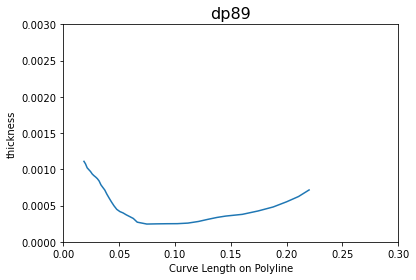

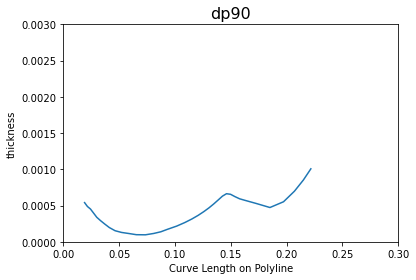

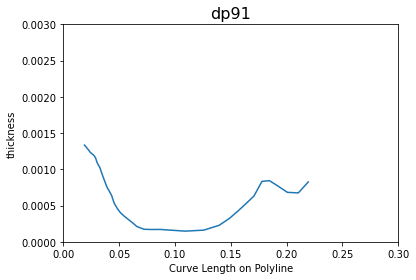

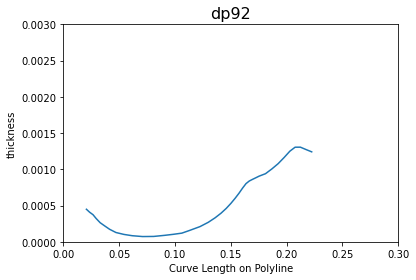

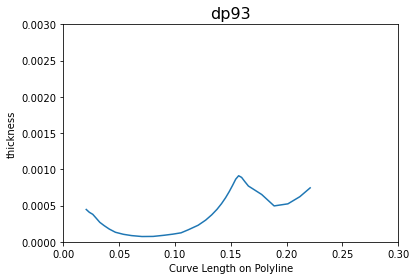

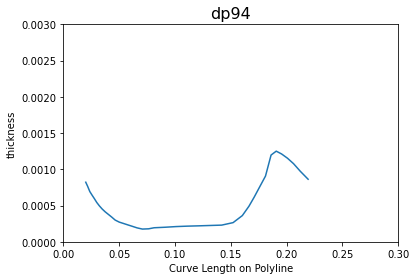

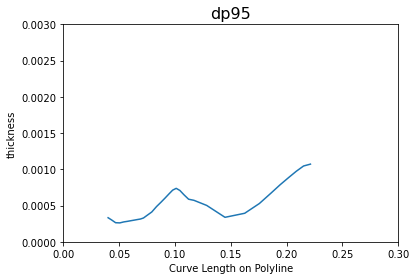

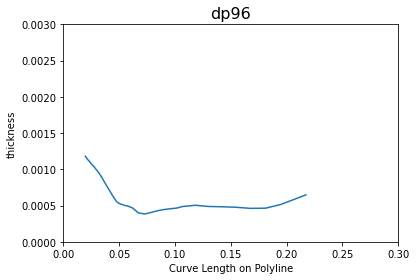

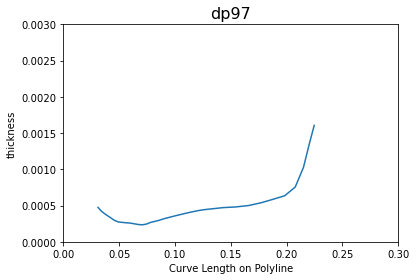

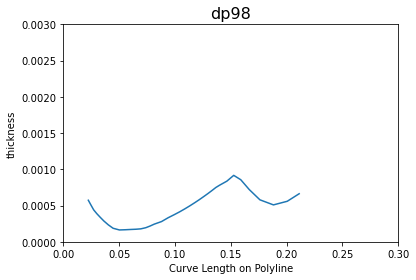

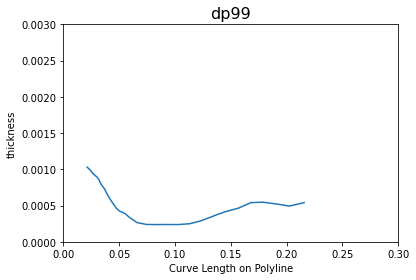

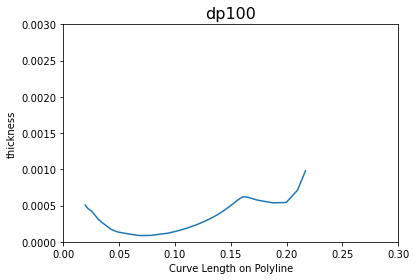

<Figure size 432x288 with 0 Axes>

In [5]:
for i in range (100):
    s = "plt.plot(thickness_dp%d.iloc[:,0],thickness_dp%d.iloc[:,1])"%(i+1,i+1)
    exec(s)
    plt.xlabel("Curve Length on Polyline")
    plt.ylabel("thickness")
    plt.xlim(0,0.3)
    plt.ylim(0,0.003)
    plt.title("dp%d"%(i+1),fontsize = 16)
#     plt.savefig("C:/Users/SDML/Desktop/blow thickness plot/dp%d_thickness plot.jpg"%(i+1))
    plt.show()
#     plt.close()
    plt.clf()


In [6]:
nonepeak_dp = []
for k in range(100):
    temp_peak_index = []
    temp_peak_polylen = []
    exec("temp_thick = thickness_dp%d"%(k+1))
    for i in range(temp_thick.shape[0]-2):
        
        if temp_thick.iloc[i,1]<temp_thick.iloc[i+1,1]:
            if temp_thick.iloc[i+1,1]>temp_thick.iloc[i+2,1]:
                temp_peak_index = np.append(temp_peak_index, i+1)
                
    if type(temp_peak_index) == list:
#         temp_peak_polylen = np.append(temp_peak_polylen , "None")
        nonepeak_dp = np.append(nonepeak_dp,k+1)
    else:
        for j in range(temp_peak_index.shape[0]):
            temp_peak_polylen = np.append(temp_peak_polylen,temp_thick.iloc[int(temp_peak_index[j]),0])
    
    exec("peak_polylen_dp%d = temp_peak_polylen"%(k+1))

In [7]:
peak_polylen_dp36

[]

In [8]:
thickness_dp1

,Curve Length on Polyline 1 [ m ],THICKNESS [ m ]
0,0.018458,0.000639
1,0.020766,0.000563
2,0.023228,0.000525
3,0.025537,0.000469
4,0.028286,0.000401
5,0.031332,0.000353
6,0.034518,0.000308
7,0.038071,0.000259
8,0.042211,0.000210
9,0.046897,0.000173


In [9]:
thickness_dp1.iloc[0,0]

0.0184575785

In [10]:
thickness_dp1.iloc[-1,0]

0.207106188

In [11]:
SideLength = thickness_dp1.iloc[-1,0] - thickness_dp1.iloc[0,0]
interval = SideLength/8
Pn = []
for i in range(8):
    if type(peak_polylen_dp1) == list:
        Pn = np.append(Pn,"None")
        break
    else:
        for j in range(peak_polylen_dp1.shape[0]):
            if thickness_dp1.iloc[0,0]+ i * interval < peak_polylen_dp1[j] < thickness_dp1.iloc[0,0]+ (i+1) * interval:
                Pn = np.append(Pn,i+1)

In [12]:
Pn

array([7.])

In [13]:
for k in range(100):
    exec("temp_thick = thickness_dp%d"%(k+1))
    exec("temp_peak_polylen = peak_polylen_dp%d"%(k+1))
    SideLength = temp_thick.iloc[-1,0] - temp_thick.iloc[0,0]
    interval = SideLength/8
    Pn = []
    for i in range(8):
        if type(temp_peak_polylen) == list:
            Pn = np.append(Pn,"None")
            break
        else:
            for j in range(temp_peak_polylen.shape[0]):
                if temp_thick.iloc[0,0]+ i * interval < temp_peak_polylen[j] < temp_thick.iloc[0,0]+ (i+1) * interval:
                    Pn = np.append(Pn,i+1)
    exec("Pn_dp%d = Pn"%(k+1))

In [17]:
k = 2
k in nonepeak_dp

False

In [20]:
peak_position2 = pd.DataFrame(np.zeros((100,5)),columns = ['case','number of peaks','peak1','peak2','peak3'])
for k in range(100):
    exec("temp_Pn = Pn_dp%d"%(k+1))
    case = "dp%d"%(k+1)
    peak_position2.iloc[k,0] = case
    peak_position2.iloc[k,1] = int(temp_Pn.shape[0])
    if k+1 in nonepeak_dp:
        peak_position2.iloc[k,1] = 0
    
    for j in range(temp_Pn.shape[0]):
        peak_position2.iloc[k,j+2] = temp_Pn[j]
peak_position2

,case,number of peaks,peak1,peak2,peak3
0,dp1,1.0,7.0,0.0,0.0
1,dp2,3.0,1.0,3.0,8.0
2,dp3,2.0,2.0,6.0,0.0
3,dp4,1.0,5.0,0.0,0.0
4,dp5,1.0,4.0,0.0,0.0
5,dp6,1.0,3.0,0.0,0.0
6,dp7,1.0,8.0,0.0,0.0
7,dp8,1.0,6.0,0.0,0.0
8,dp9,1.0,5.0,0.0,0.0
9,dp10,0.0,None,0.0,0.0


In [21]:
inputdata = pd.read_csv('./input.csv',skiprows = 6, sep=',')
inputdata

,Name,P1,P2,P3,P4,P5,P6,P7,P8,P10
0,DP 0,80,120.0,110.0,100.0,98.0,85.0,80.0,80.0,0.002414
1,DP 1,80,80.2,105.4,103.8,114.2,82.2,99.8,100.6,0.002639
2,DP 2,80,80.6,83.8,97.0,105.8,86.2,113.4,81.8,0.002597
3,DP 3,80,81.0,93.8,115.0,118.6,105.4,98.2,98.6,0.002549
4,DP 4,80,81.4,107.8,87.4,98.6,108.2,87.8,91.8,0.002536
...,...,...,...,...,...,...,...,...,...,...
96,DP 96,80,118.2,108.2,116.6,117.0,106.2,94.6,82.6,0.002395
97,DP 97,80,118.6,109.8,80.6,109.8,107.0,99.4,94.2,0.002536
98,DP 98,80,119.0,104.6,109.8,111.0,89.4,93.0,97.0,0.002611
99,DP 99,80,119.4,80.6,100.2,119.4,109.8,109.4,89.8,0.002535


In [54]:
temp_slope_at_peak = pd.DataFrame(np.zeros((100,11)),columns = ['case','number of peaks',
                                                                'peak1','peak1 front slope','peak1 back slope',
                                                                'peak2','peak2 front slope','peak2 back slope',
                                                                'peak3','peak3 front slope','peak3 back slope'])
for k in range(100):
    for j in range(int(peak_position.iloc[k,1])):
        peak_point = peak_position2.iloc[k,j+2]
        
        if peak_point == 1:
            front_slope = 0
            back_slope  = inputdata.iloc[k+1,2]-inputdata.iloc[k+1,1]
            
        elif peak_point == 8:
            front_slope = inputdata.iloc[k+1,8]-inputdata.iloc[k+1,7]
            back_slope  = 0
            
        else:
            front_slope = inputdata.iloc[k+1,int(peak_point)]-inputdata.iloc[k+1,int(peak_point)-1]
            back_slope  = inputdata.iloc[k+1,int(peak_point)+1]-inputdata.iloc[k+1,int(peak_point)]
        
        temp_slope_at_peak.iloc[k,3*j+3] = front_slope
        temp_slope_at_peak.iloc[k,3*j+4] = back_slope

In [55]:
for m in range(100):
    exec("temp_Pn = Pn_dp%d"%(m+1))
    case = "dp%d"%(m+1)
    temp_slope_at_peak.iloc[m,0] = case
    temp_slope_at_peak.iloc[m,1] = int(temp_Pn.shape[0])
    if m+1 in nonepeak_dp:
        temp_slope_at_peak.iloc[m,1] = 0
    
    for n in range(temp_Pn.shape[0]):
        if temp_slope_at_peak.iloc[m,1] == 0:
            temp_slope_at_peak.iloc[m,3*n+2] = temp_Pn[n]
        else:
            position = "P%d"%(temp_Pn[n])
            temp_slope_at_peak.iloc[m,3*n+2] = position

In [57]:
temp_slope_at_peak

,case,number of peaks,peak1,peak1 front slope,peak1 back slope,peak2,peak2 front slope,peak2 back slope,peak3,peak3 front slope,peak3 back slope
0,dp1,1.0,P7,17.6,0.8,0.0,0.0,0.0,0.0,0.0,0.0
1,dp2,3.0,P1,0.0,0.6,P3,3.2,13.2,P8,-31.6,0.0
2,dp3,2.0,P2,1.0,12.8,P6,-13.2,-7.2,0.0,0.0,0.0
3,dp4,1.0,P5,11.2,9.6,0.0,0.0,0.0,0.0,0.0,0.0
4,dp5,1.0,P4,22.4,-10.8,0.0,0.0,0.0,0.0,0.0,0.0
5,dp6,1.0,P3,16.8,-13.6,0.0,0.0,0.0,0.0,0.0,0.0
6,dp7,1.0,P8,36.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,dp8,1.0,P6,25.2,-12.4,0.0,0.0,0.0,0.0,0.0,0.0
8,dp9,1.0,P5,8.8,-19.2,0.0,0.0,0.0,0.0,0.0,0.0
9,dp10,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
over25 = 0
for a in range(temp_slope_at_peak.shape[0]):
    for b in range(3):
        if temp_slope_at_peak.iloc[a,3*b+3] >25:
            over25 = over25+1
        if temp_slope_at_peak.iloc[a,3*b+4] >25:
            over25 = over25+1
over25

19

In [72]:
over25 = 0
for a in range(temp_slope_at_peak.shape[0]):
    for b in range(3):
        if temp_slope_at_peak.iloc[a,3*b+3] < -25:
            over25 = over25+1
        if temp_slope_at_peak.iloc[a,3*b+4] < -25:
            over25 = over25+1
over25

18

In [81]:
over25 = 0
for a in range(temp_slope_at_peak.shape[0]):
    for b in range(3):
        if temp_slope_at_peak.iloc[a,3*b+3] * temp_slope_at_peak.iloc[a,3*b+4] < -200:
            over25 = over25+1
#         if temp_slope_at_peak.iloc[a,3*b+4] < -25:
#             over25 = over25+1
over25

34

In [51]:
for a in range(temp_slope_at_peak.shape[0]):
    for b in range(temp_slope_at_peak.shape[1]-2):
        if temp_slope_at_peak.iloc[a,b+2] == 0:
            temp_slope_at_peak.iloc[a,b+2] = '-'

In [52]:
temp_slope_at_peak

,case,number of peaks,peak1,peak1 front slope,peak1 back slope,peak2,peak2 front slope,peak2 back slope,peak3,peak3 front slope,peak3 back slope
0,dp1,1.0,P7,17.6,0.8,-,-,-,-,-,-
1,dp2,3.0,P1,-,0.6,P3,3.2,13.2,P8,-31.6,-
2,dp3,2.0,P2,1.0,12.8,P6,-13.2,-7.2,-,-,-
3,dp4,1.0,P5,11.2,9.6,-,-,-,-,-,-
4,dp5,1.0,P4,22.4,-10.8,-,-,-,-,-,-
5,dp6,1.0,P3,16.8,-13.6,-,-,-,-,-,-
6,dp7,1.0,P8,36.8,-,-,-,-,-,-,-
7,dp8,1.0,P6,25.2,-12.4,-,-,-,-,-,-
8,dp9,1.0,P5,8.8,-19.2,-,-,-,-,-,-
9,dp10,0.0,None,-,-,-,-,-,-,-,-


In [53]:
pd.DataFrame(temp_slope_at_peak).to_csv("D:/testoneblow/input_temp & peak relationship.csv")

In [93]:
dp1_xy = pd.read_csv('./test4/dp1-blow-xy.csv',skiprows = 4, sep=',')

In [94]:
dp1_xy

,X [ m ],Y [ m ]
0,0.000000,-0.109150
1,0.001207,-0.109163
2,0.002412,-0.109207
3,0.003625,-0.109278
4,0.004879,-0.109375
5,0.006186,-0.109461
6,0.007472,-0.109579
7,0.008894,-0.109729
8,0.010500,-0.109989
9,0.012096,-0.110220
